### Import Libraries

In [1]:
# Import Libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,  ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load the CARDIOVASCULAR RISK DATA from a local file path
risk_df = pd.read_csv('C:\\Users\\maram\\Desktop\\New folder\\data_cardiovascular_risk.csv', index_col='id')

### Dataset First View

In [3]:
# Viewing the top 5 rows to take a glimpse of the data
risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns Count

In [4]:
print(f'rows :  {risk_df.shape[0]}  \n columns :   {risk_df.shape[1]}')

rows :  3390  
 columns :   16


### Dataset Information

Demographic
* **age  :** Age of the patient 
* **education :** level of education from 1 to 4 
* **sex :** male or female (M/F)
Behavioral
* **is_smoking :**  the patient is a current smoker (YES /NO)
* **cigsPerDay :** the number of cigarettes that the person smoked on average in one day 
Medical record
* **BPMeds :**  blood pressure medication 
* **prevalentStroke :** patient had previously had a stroke
* **prevalentHyp :**  the patient was hypertensive 
* **diabetes :** the patient had diabetes 
* **totChol :** total cholesterol level 
* **sysBP :** systolic blood pressure 
* **diaBP :** diastolic blood pressure 
* **BMI :** Body Mass Index 
* **heartRate :** heart rate
* **glucose :** glucose level 
* **TenYearCHD :** ( 1-> Yes, 0 -> No)

In [5]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


###  factors of data

In [6]:
# Dataset Columns
risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Data numeric and categoral data

In [7]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:  
  if risk_df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


#####  Scatter plot between target varible  age ,heartRate 

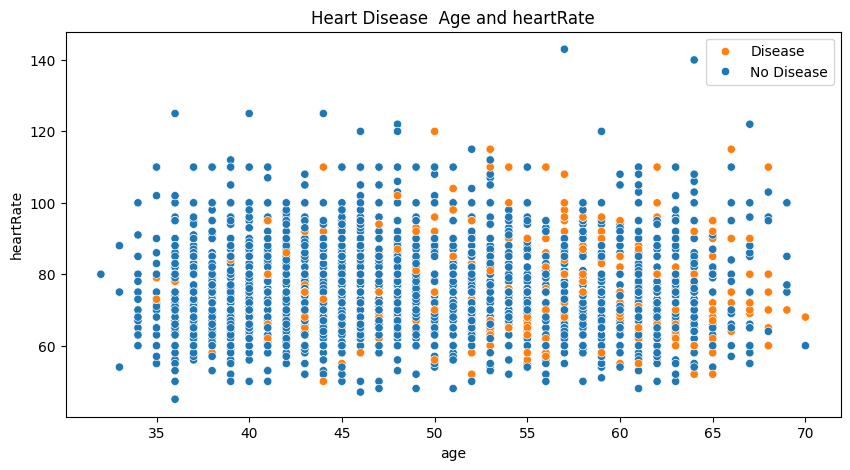

In [8]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=risk_df)
# title
plt.title('Heart Disease  Age and heartRate')
plt.legend(['Disease', 'No Disease'])

###  Missing Values

In [9]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [11]:
# checking the shape of the data before missing value treatment
risk_df.shape

(3390, 16)

### Handling null value

In [12]:


# List of columns with NaN values
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Creating an imputer object with strategy as 'median'
imputer = SimpleImputer(strategy='median')

# Applying the imputer to all nan_columns
risk_df[nan_columns] = imputer.fit_transform(risk_df[nan_columns])


In [13]:
# checking for null values after treating them.
risk_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
# checking the shape of the data after missing values treatment
risk_df.shape

(3390, 16)

check skew of data 

In [15]:
# statistical summary
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.0000,70.0
education,3390.0,1.971681,1.005925,1.00,1.00,2.00,3.0000,4.0
cigsPerDay,3390.0,9.010619,11.862839,0.00,0.00,0.00,20.0000,70.0
BPMeds,3390.0,0.029499,0.169224,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.0000,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.0000,1.0
totChol,3390.0,237.039823,44.994205,107.00,206.00,234.00,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.0000,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.0000,142.5


Skewness: The data is likely right-skewed, with more values clustered towards the lower end (e.g., between 50 and 85) due to 
Outliers: The value 200 is an outlier because it is much higher than the majority of the data points.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size
plt.figure(figsize=(15, 5))
# Title for the entire figure
plt.suptitle('Data Distribution in Numerical Columns', fontsize=20, fontweight='bold', y=1.02)

# Loop through each numeric feature
for i, col in enumerate(numeric_features):
    plt.subplot(2, 4, i + 1)  # Create subplots with 2 rows and 4 columns
    
    # Create a histogram with a kernel density estimate (KDE)
    sns.histplot(risk_df[col], kde=True, color='lightblue', bins=30)
    
    # Add a vertical line for the mean
    plt.axvline(risk_df[col].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
    
    # Add a vertical line for the median
    plt.axvline(risk_df[col].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
    
    # Set the x-axis label
    plt.xlabel(col)
    # Add a legend to indicate what the lines represent
    plt.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

# Show the plot
plt.show()

## Treat outliers

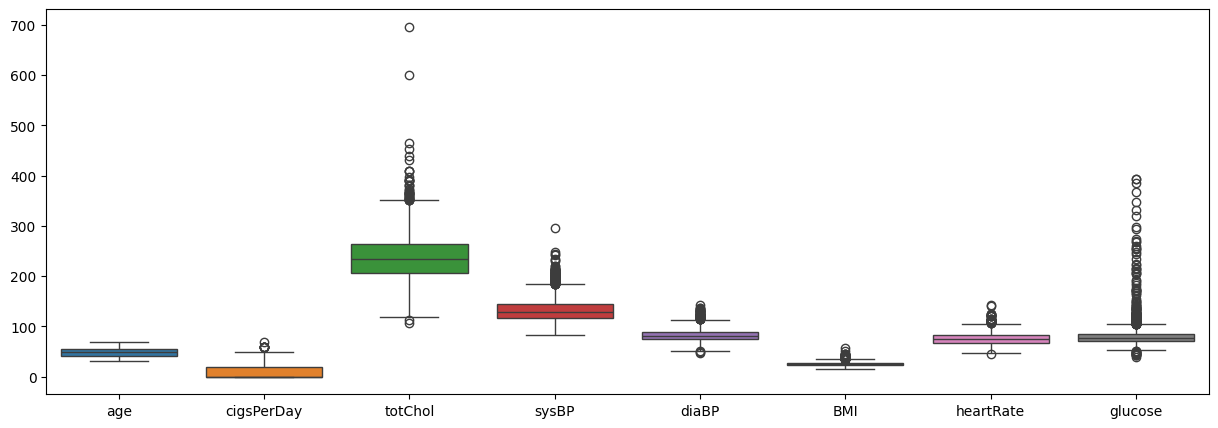

In [ ]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical Factors
sns.boxplot(data=risk_df[numeric_features])
plt.show()    

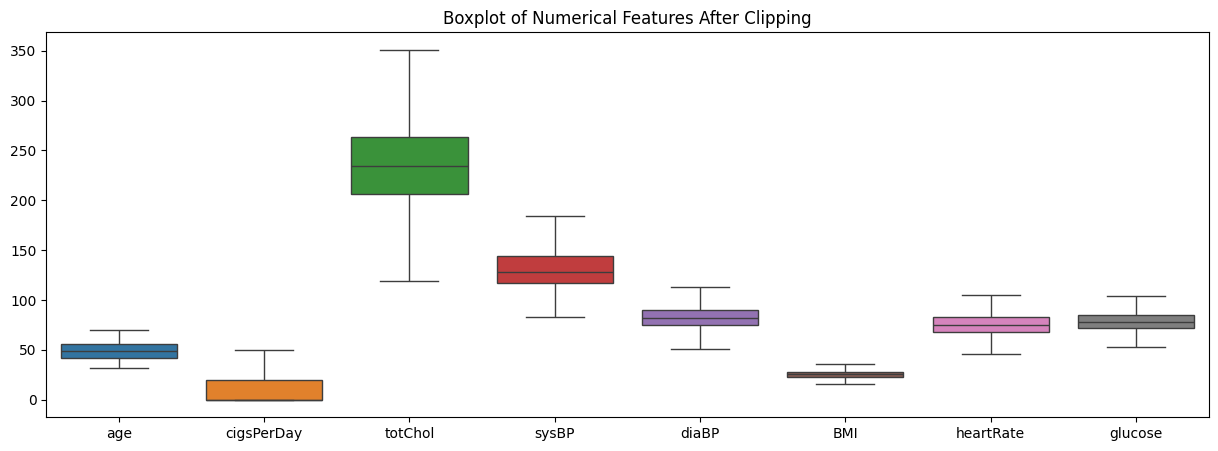

In [ ]:

# Function to clip outliers
def clip_outliers(risk_df):
    # Loop through numeric features
    for col in numeric_features:
        # Using IQR method to define range of upper and lower limits
        q1 = risk_df[col].quantile(0.25)
        q3 = risk_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Replacing the outliers with upper and lower bound
        risk_df[col] = risk_df[col].clip(lower=lower_bound, upper=upper_bound)
        
    return risk_df

# Apply the clipping function
risk_df = clip_outliers(risk_df)

# Plotting the boxplot of numerical features after clipping
plt.figure(figsize=(15, 5))
sns.boxplot(data=risk_df[numeric_features])
plt.title('Boxplot of Numerical Features After Clipping')
plt.show()


## Distribution after treating

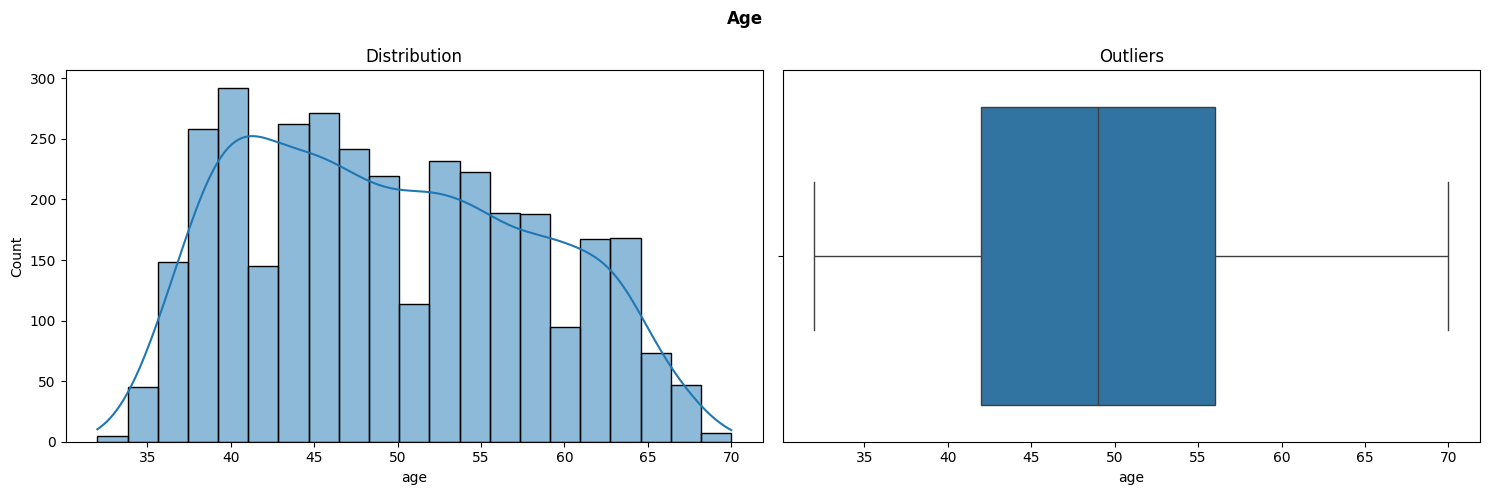

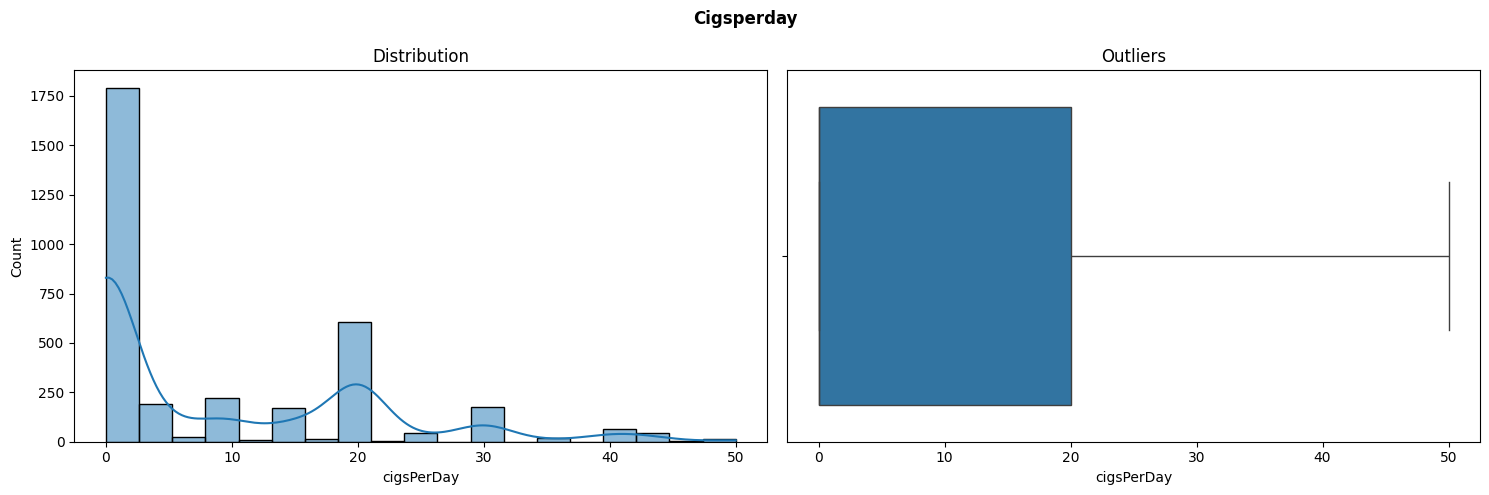

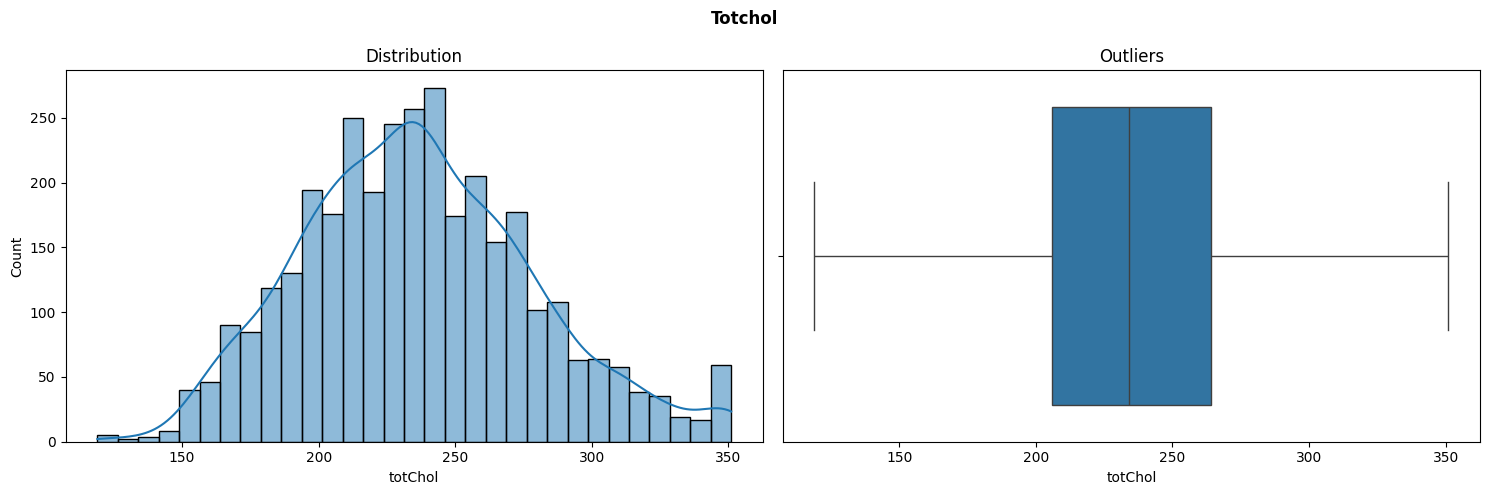

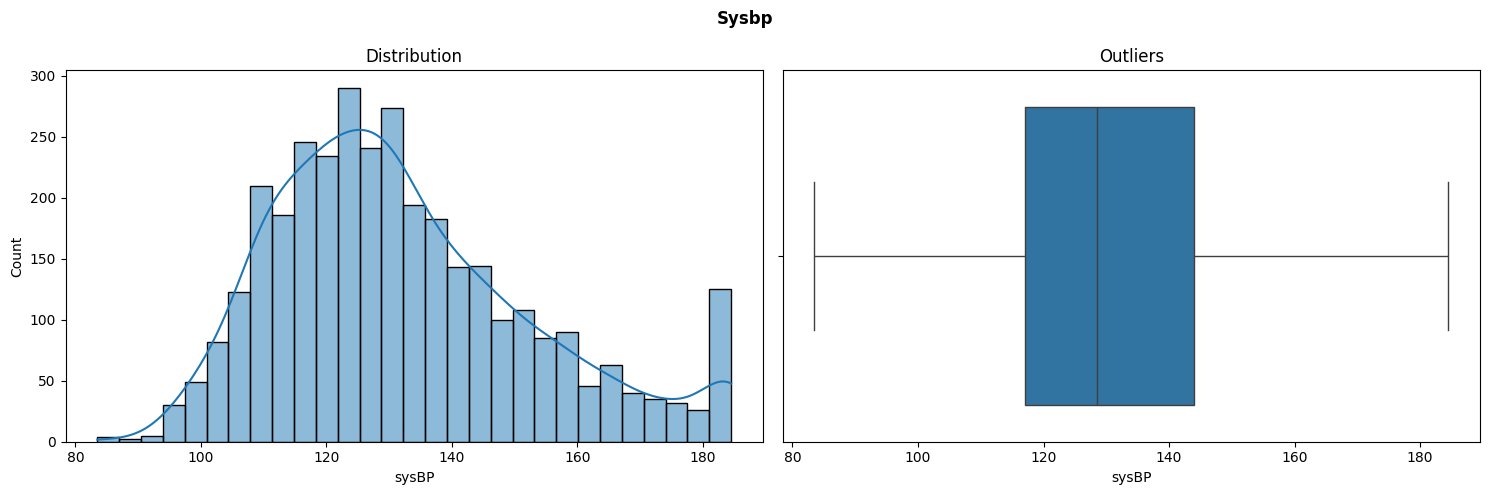

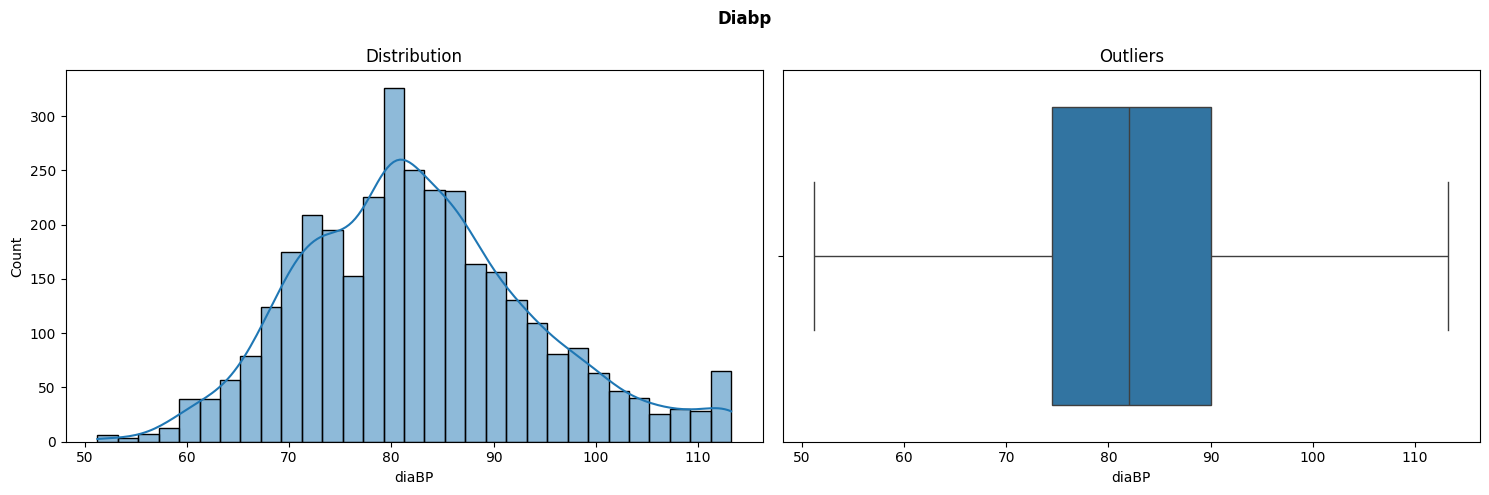

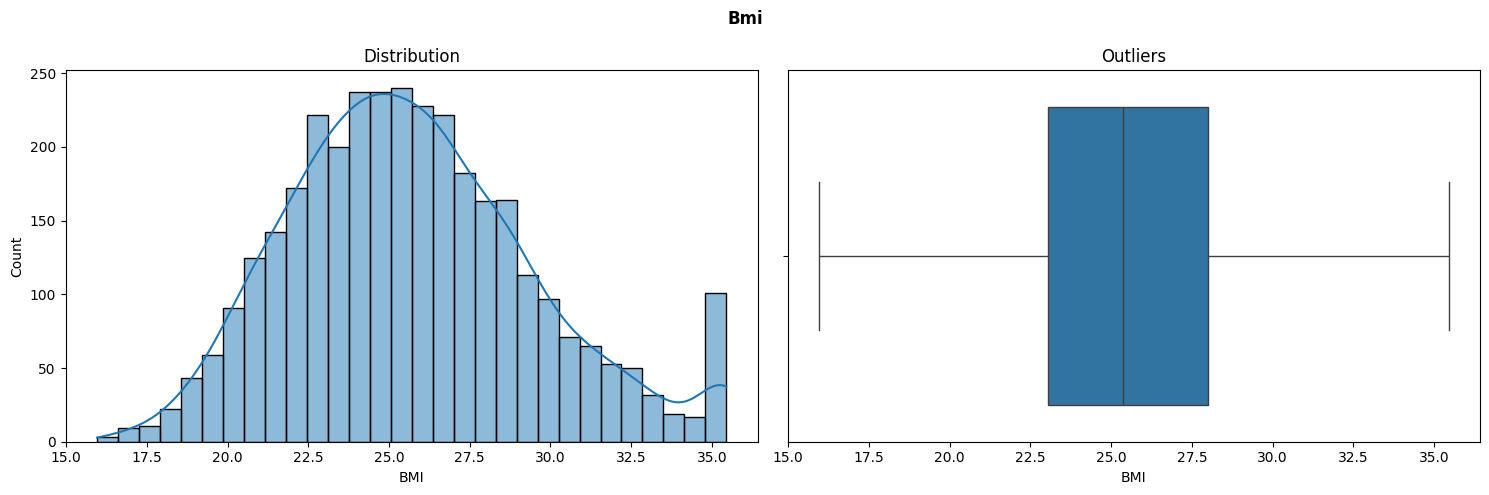

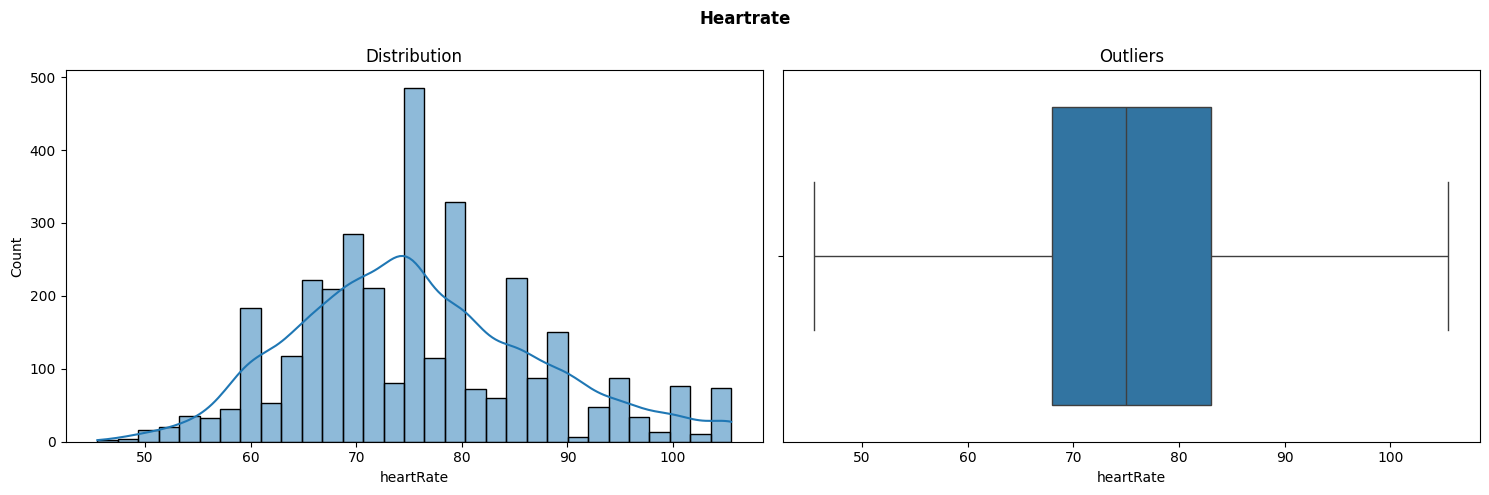

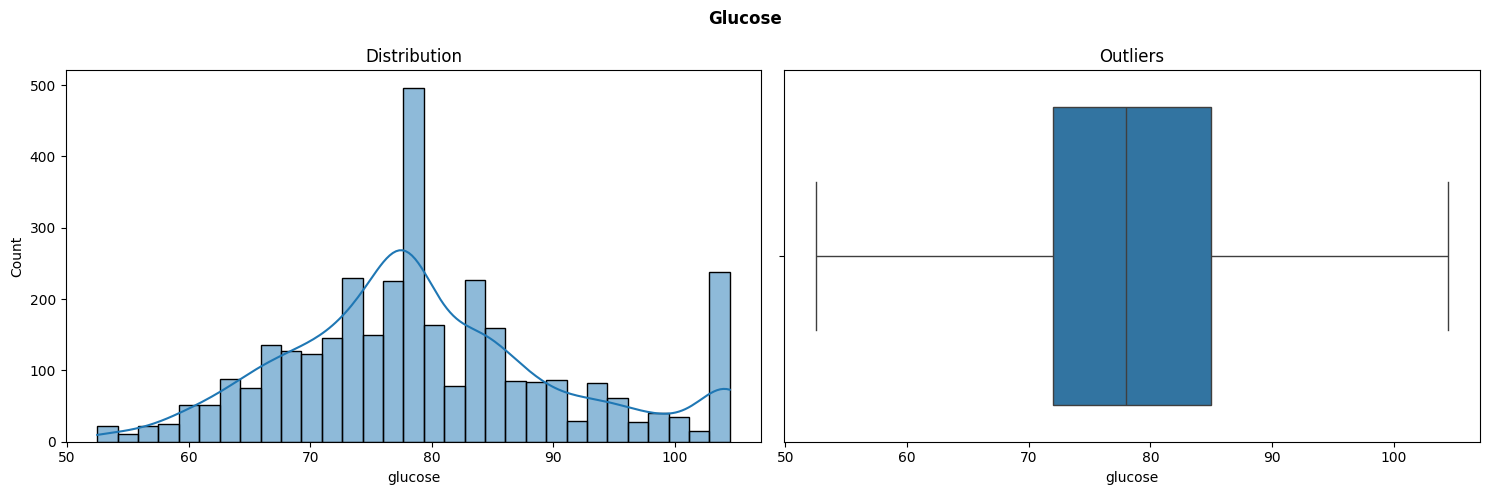

In [ ]:
# Checking for distribution after treating outliers
for col in numeric_features:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
    # Plotting the distribution of the column
    sns.histplot(risk_df[col], ax=ax[0], kde=True).set(title="Distribution")
    # Plotting the boxplot of the column
    sns.boxplot(x=risk_df[col], ax=ax[1]).set(title="Outliers")
    plt.suptitle(f'{col.title()}', weight='bold')
    plt.tight_layout()
    plt.show()  # Display each plot after the loop


After treating outliers, the data distributions have shifted closer to normal, reducing skewness, the features almost follow the normal distribution.

##  Feature Engineering

Feature engineering creates new or refined features from existing data to improve machine learning model performance, making the data more informative and useful for the model. 
use many techniques :
used befor ->Imputation: Handling missing data by filling gaps with mean, median, mode, or other methods.
Encoding Categorical Variables: Converting categorical data into numerical form using methods like one-hot encoding or label encoding.


### Encoding

 All encoding techniques:

1. Label Encoding: Assigns an integer to each category. Best for ordinal data.
2. One-Hot Encoding: Converts each category into binary columns. Used for nominal data.
3. Ordinal Encoding: Assigns ranked integers based on order.
4. Target Encoding: Replaces categories with the mean of the target variable.
5. Frequency Encoding: Encodes categories by their frequency of occurrence.
6. Binary Encoding: Converts categories into binary codes with fewer columns.
7. Hash Encoding: Uses a hash function, suitable for high cardinality.
8. Leave-One-Out Encoding: Similar to target encoding but excludes the current row.
9. Count Encoding: Replaces categories with their counts.



Label Encoding:  use  to assign 0 and 1 to each category.

Example:
Sex: Male → 0, Female → 1
Smoking: Non-smoker → 0, Smoker → 1

In [ ]:
#label encoding
risk_df['sex'] = risk_df['sex'].map({'M':1, 'F':0})
risk_df['is_smoking'] = risk_df['is_smoking'].map({'YES':1, 'NO':0})

One-Hot Encoding-> use for education example:
    High School: 1  , Bachelor: 2,       Master: 3,   PhD: 4



In [ ]:
# One-hot encode the 'education' feature
education_onehot = pd.get_dummies(risk_df['education'], prefix='education')

# Drop the original education feature
risk_df.drop('education', axis=1, inplace=True)

# Concatenate the one-hot encoded education feature with the rest of the data
risk_df = pd.concat([risk_df, education_onehot], axis=1)
risk_df.head(3)


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
id,,,,,,,,,,,,,,,,,,,
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,False,True,False,False
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,False,False,True
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,False


### Feature Selection

Select the most important features from a larger set of features to use as inputs for a model. The goal is to reduce the number of features used in the model, like correlation analysis, feature importance from models, or Lasso regression.

Correlation Coefficient and Heatmap

 The correlation coefficient measures the strength and direction of a linear relationship between two variables, ranging from -1 (perfect negative) to 1 (perfect positive), with 0 indicating no correlation.

 The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

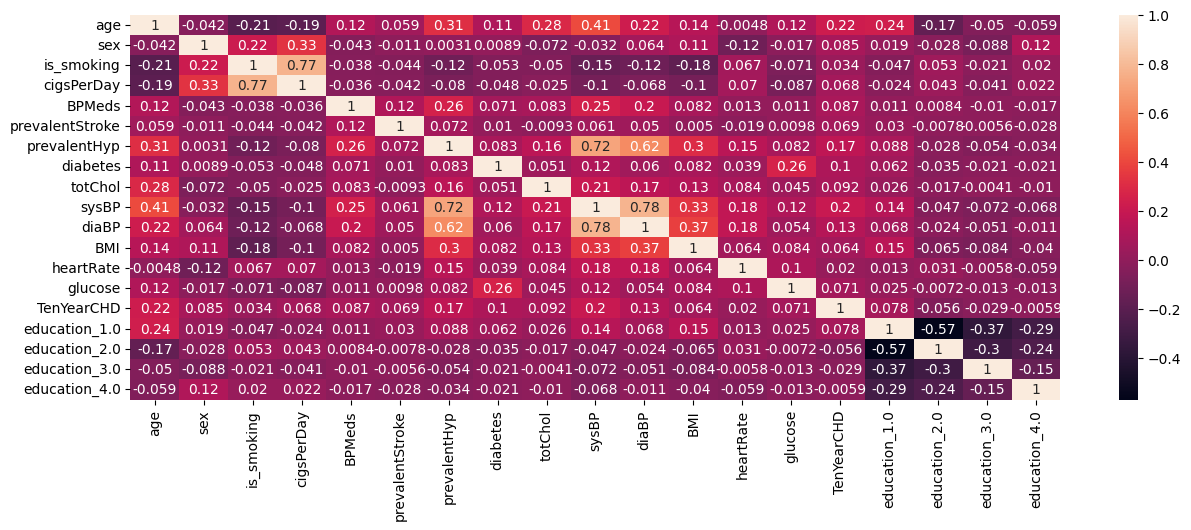

In [ ]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(risk_df.corr(), annot=True)     

In [ ]:
def mustremove_correlated_features(data, threshold):
    correlated_columns = set()  # Set to hold names of correlated features
    correlation_matrix = data.corr()  # Calculate the correlation matrix

    # Iterate through the correlation matrix
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            # Check if the absolute correlation exceeds the threshold
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                # Add the column name to the set of correlated columns
                column_name = correlation_matrix.columns[i]
                correlated_columns.add(column_name)

    return correlated_columns  # Return the set of correlated column names


The threshold is a predetermined value that defines what level of correlation is considered "high." It helps in deciding which features to keep,Remove features with high correlation to reduce redundancy and improve model performance.

In [ ]:
# checking the highly correlated features
mustremove_correlated_features(risk_df, 0.7)          # setting threshold of 0.7

{'cigsPerDay', 'diaBP', 'sysBP'}

Feature Manipulation

Creating New Features
Interaction Features: Creates new features by combining two or more existing features (e.g., multiplying or adding them together).
Pulse pressure is the difference between the systolic and diastolic blood pressure readings.

Pulse Pressure= Systolic Pressure− Diastolic Pressure
Example: For a blood pressure reading of 120/80 mm Hg:
Pulse Pressure=120−80=40 mm Hg
This pulse pressure of 40 mm Hg is considered healthy.
Health Implications
A pulse pressure greater than 40 mm Hg is often considered a potential indicator of cardiovascular issues, as it may suggest that the arteries are stiffer or that there is increased strain on the heart.

In [ ]:
# adding new column PulsePressure 
risk_df['pulse_pressure'] = risk_df['sysBP'] - risk_df['diaBP']

# dropping  sysBP and diaBP columns
risk_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

handel this case : If a person smokes , but the number of  cigsPerDay is 0.

In [ ]:
# Count the number of rows where is_smoking is 'YES' and cigsPerDay is 0
count = risk_df[(risk_df.is_smoking == 'YES') & (risk_df.cigsPerDay == 0)].shape[0]
print(count)


0


It is sufficient to provide information regarding is_smoking in the cigsPerDay column, so we will drop is_smoking 

In [ ]:
# droping is_smoking column 
risk_df.drop('is_smoking', axis=1, inplace=True)

###  Extra Trees Classifier


The **Extra Trees Classifier** ranks features based on their ability to reduce Gini impurity during tree splits. 

1. **Gini Impurity**: Measures the impurity of a node, indicating how well the node separates classes.
  
2. **Tree Structure**: Features that lead to significant decreases in Gini impurity are prioritized. Nodes near the root show greater impurity reductions than leaf nodes.

3. **Feature Importance**: Features consistently reducing Gini impurity across trees are deemed important. 

4. **Pruning**: Less important features can be excluded by setting a threshold for Gini impurity reduction, focusing on the most impactful features.

This process enhances model performance and interpretability.

In [ ]:
# x->variable contains all the features except TenYearCHD,y-> target variable 'TenYearCHD'
X = risk_df.drop('TenYearCHD', axis=1)
y= risk_df['TenYearCHD']


# model fitting 
#An instance of the ExtraTreesClassifier is created and stored in the variable model.
#The fit method is called on model, passing in X and y. 
#This trains the Extra Trees model using the provided features and target variable.
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.145956
pulse_pressure     0.137289
BMI                0.129790
totChol            0.127799
heartRate          0.121096
glucose            0.120772
cigsPerDay         0.085627
prevalentHyp       0.025081
sex                0.021781
education_1.0      0.015948
education_2.0      0.014372
education_3.0      0.012755
diabetes           0.012327
education_4.0      0.011823
BPMeds             0.010458
prevalentStroke    0.007125
dtype: float64


## Univariate Feature Selection

SelectKBest: This method evaluates features based on univariate statistical tests and selects the top K features with the highest scores according to the chosen test .

In [ ]:

# Define X and y
X = risk_df.drop('TenYearCHD', axis=1)
y = risk_df['TenYearCHD']
# Create a SelectKBest instance with the desired number of top features (e.g., 10)
k = 10  # You can adjust this value
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get the scores of each feature
feature_scores = selector.scores_

# Create a Pandas Series to display features and their scores
ranked_features = pd.Series(feature_scores, index=X.columns)

# Print the top K features based on their scores
print(ranked_features.nlargest(k))


age                180.540028
pulse_pressure     135.783905
prevalentHyp        96.654046
diabetes            36.815791
totChol             28.810194
BPMeds              26.048922
sex                 24.450375
education_1.0       20.548591
glucose             17.127435
prevalentStroke     16.031694
dtype: float64


###  Chi-square Test

Chi-Squared Test: For categorical features,determine if a variable is related to target variable. A low p-value indicates a significant relationship.

In [ ]:

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     504.562956
age                255.538687
cigsPerDay         243.225903
totChol            221.707805
prevalentHyp        64.377708
diabetes            35.506306
glucose             28.487377
BPMeds              25.102438
prevalentStroke     15.861998
sex                 13.778390
education_1.0       12.051063
BMI                  7.945880
education_2.0        7.125853
heartRate            2.315308
education_3.0        2.314815
education_4.0        0.103685
dtype: float64

### Information Gain

This technique calculates the reduction in entropy or uncertainty in the target variable when a feature is used for splitting. Features that provide significant information gain are deemed important.

In [ ]:

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance. 
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.022041
prevalentHyp       0.016976
education_1.0      0.011114
totChol            0.010613
education_2.0      0.008047
pulse_pressure     0.006068
BMI                0.004083
diabetes           0.003559
sex                0.003309
prevalentStroke    0.003134
cigsPerDay         0.002342
education_3.0      0.001335
glucose            0.000859
BPMeds             0.000000
heartRate          0.000000
education_4.0      0.000000
dtype: float64

###  Feature Importance

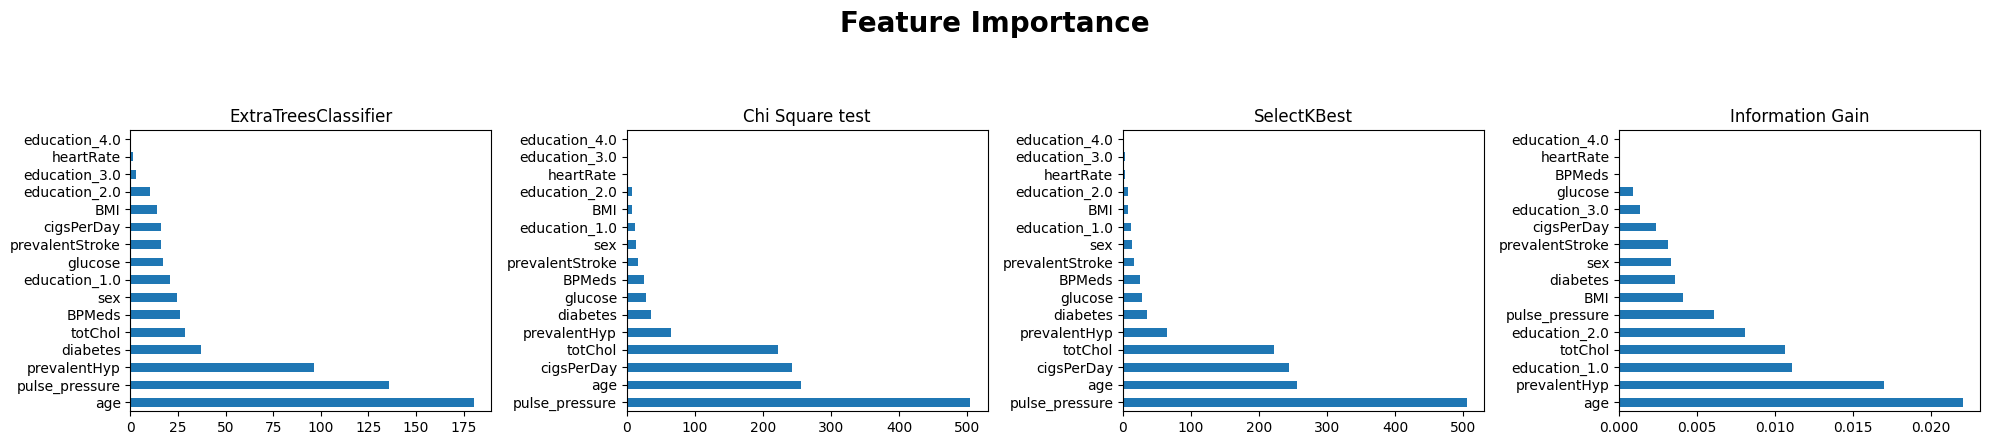

In [ ]:
# plotting graph 
fig, axs = plt.subplots(1,4, figsize=(20,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='SelectKBest', ax=axs[2])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[3])
plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

**From result show  we can say that the  most important features are 'age and 'pulse_pressure' to predict the target variable**

<Axes: >

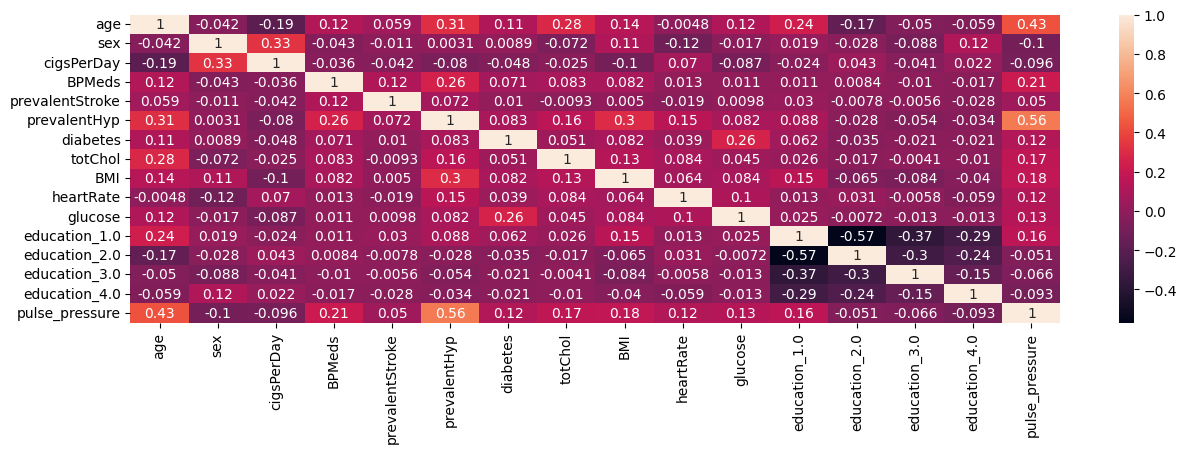

In [ ]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(15,4))
sns.heatmap(risk_df.drop(columns='TenYearCHD').corr(),annot=True)

In [ ]:
mustremove_correlated_features(risk_df, 0.7)         # 0.7 is the thresold value for multicollinearity

set()

### balance 

In [ ]:
# copying the data to save the work done 
model_df = risk_df.copy()
model_df.head(3)

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,,
0,64,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,False,True,False,False,63.0
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,False,False,False,True,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,True,False,False,False,45.0


In [ ]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

###  Handling Imbalance Target Variable

Checking if data is balanced or not

TenYearCHD
0    2879
1     511
Name: count, dtype: int64
 


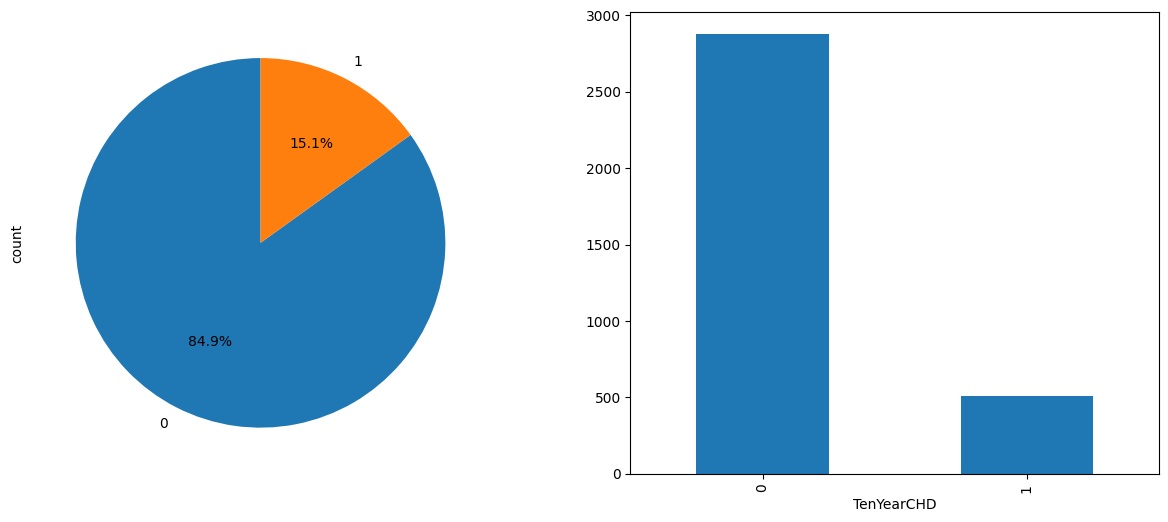

In [ ]:
# Dependant Column Value Counts
print(model_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

for Balance the Dataset: SMOTE generates synthetic samples for the minority class, thus helping balance the dataset and potentially improving the performance of machine learning models on imbalanced data.

In [ ]:
print(f'Before Handling Imbalanced class {Counter(y)}')

# helps in generating the same synthetic samples each time you run the code,
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2879, 1: 511})
After Handling Imbalanced class Counter({1: 2879, 0: 2879})


##  Model Building

###  Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Print the shapes of the training and test sets
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)


Training set shape (X_train): (4606, 16)
Test set shape (X_test): (1152, 16)


### Scaling Data

StandardScaler: This scaler standardizes features by removing the mean and scaling to unit variance (i.e., a mean of 0 and standard deviation of 1). It’s commonly used for data that follows a normal distribution.

Scaling Process:

scaler.fit_transform(X_train): Fits the scaler on the X_train data (calculates the mean and standard deviation) and scales X_train according to these statistics.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test = scaler.transform(X_test)

## Evaluate Model


1. **Accuracy**: Measures overall correct predictions; useful for balanced datasets.
2. **Confusion Matrix**: Breaks down true positives, true negatives, false positives, and false negatives; helpful for multi-class or imbalanced datasets.
3. **Precision, Recall, and F1 Score**: Precision reduces false positives, recall reduces false negatives, and F1 balances both. Crucial for imbalanced datasets.
4. **ROC-AUC**: Shows the trade-off between true positive and false positive rates; ideal for binary classification with imbalanced data.
5. **Cross-Validation**: Validates model performance by training/testing on multiple data subsets, reducing overfitting risk.
6. **MSE, RMSE, and MAE**: Measures prediction errors in regression; RMSE penalizes large errors, MAE provides straightforward interpretation.

These metrics help assess accuracy, sensitivity to errors, and generalization for various types of problems.

In [ ]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

## Model Implementation

## Logistic Regression

statistical method used for binary classification problems, where the outcome variable is categorical with two possible outcomes (e.g., success/failure, yes/no, 1/0). It estimates the probability that a given input point belongs to a certain category.

train accuracy : 0.786
test accuracy : 0.783
train precision : 0.853
test precision : 0.854
train recall : 0.693
test recall : 0.673
train f1 : 0.764
test f1 : 0.753
train roc_auc : 0.874
test roc_auc : 0.871
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       586
           1       0.85      0.67      0.75       566

    accuracy                           0.78      1152
   macro avg       0.80      0.78      0.78      1152
weighted avg       0.80      0.78      0.78      1152

--------------------------------------------------------------------------------


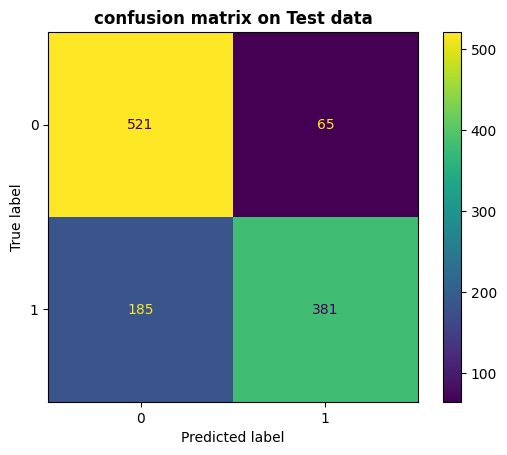

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


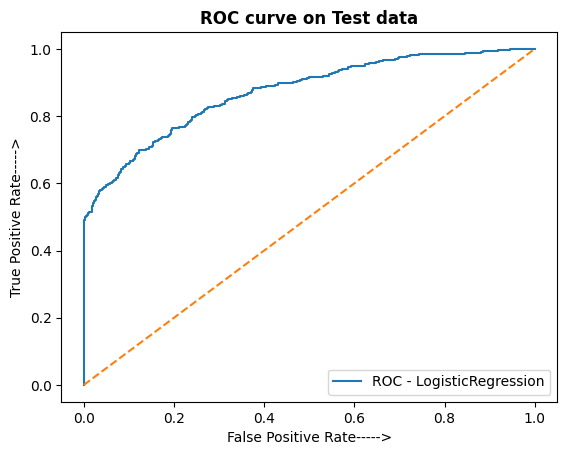

In [ ]:
predict(LogisticRegression(), 'LogisticRegression')

## SVM

supervised learning algorithm used primarily for classification tasks, but it can also be used for regression. SVM is particularly effective in high-dimensional spaces and is well-suited for cases where the number of dimensions exceeds the number of samples.

train accuracy : 0.838
test accuracy : 0.824
train precision : 0.922
test precision : 0.913
train recall : 0.74
test recall : 0.708
train f1 : 0.821
test f1 : 0.798
train roc_auc : 0.921
test roc_auc : 0.891
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.77      0.94      0.84       586
           1       0.91      0.71      0.80       566

    accuracy                           0.82      1152
   macro avg       0.84      0.82      0.82      1152
weighted avg       0.84      0.82      0.82      1152

--------------------------------------------------------------------------------


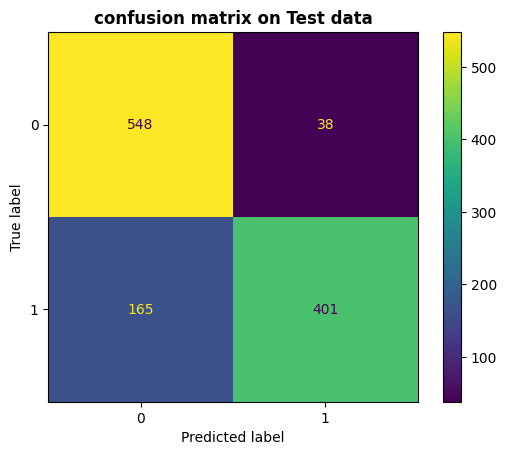

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


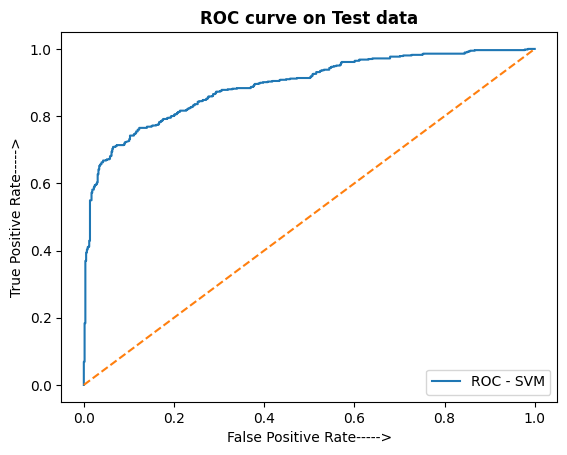

In [ ]:
predict(SVC(probability=True), 'SVM')

###  Decision Tree

upervised learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure, allowing for easy interpretation and visualization.

train accuracy : 1.0
test accuracy : 0.825
train precision : 1.0
test precision : 0.801
train recall : 1.0
test recall : 0.855
train f1 : 1.0
test f1 : 0.827
train roc_auc : 1.0
test roc_auc : 0.825
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       586
           1       0.80      0.86      0.83       566

    accuracy                           0.82      1152
   macro avg       0.83      0.83      0.82      1152
weighted avg       0.83      0.82      0.82      1152

--------------------------------------------------------------------------------


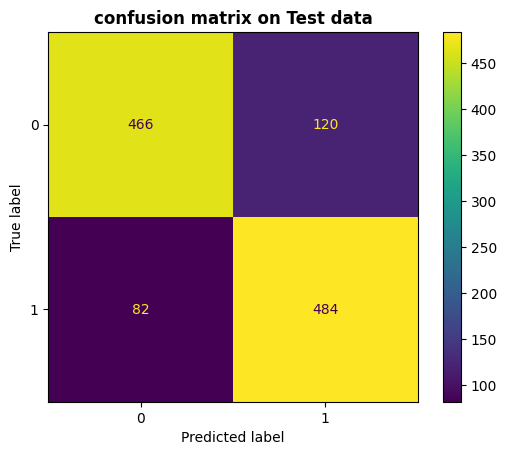

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     1     1     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


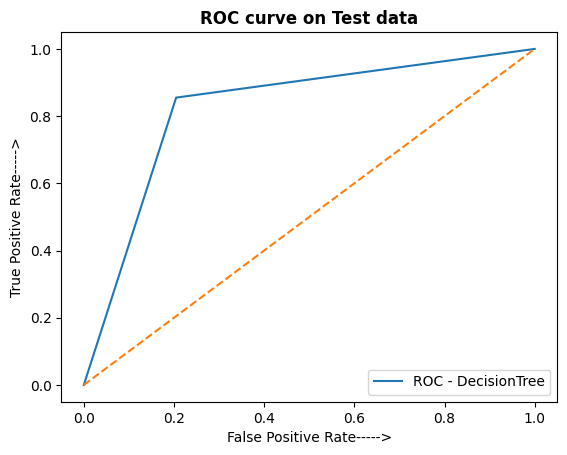

In [ ]:
predict(DecisionTreeClassifier(), 'DecisionTree')

## KNN

NN works by finding the K nearest neighbors to a given data point, calculating their distances, and predicting the label (CVD or no CVD) based on the majority class of those neighbors.

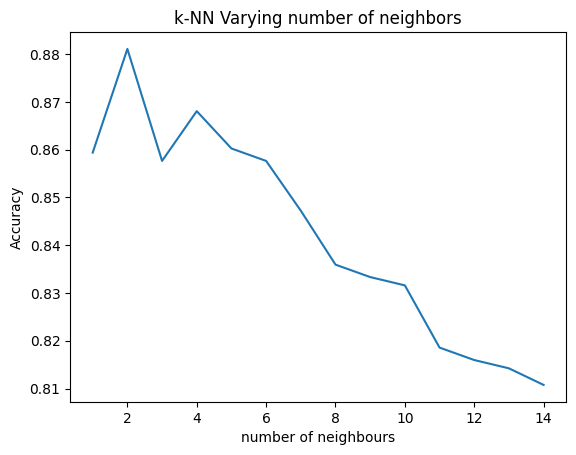

In [ ]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.859
train precision : 1.0
test precision : 0.819
train recall : 1.0
test recall : 0.917
train f1 : 1.0
test f1 : 0.865
train roc_auc : 1.0
test roc_auc : 0.86
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       586
           1       0.82      0.92      0.86       566

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152

--------------------------------------------------------------------------------


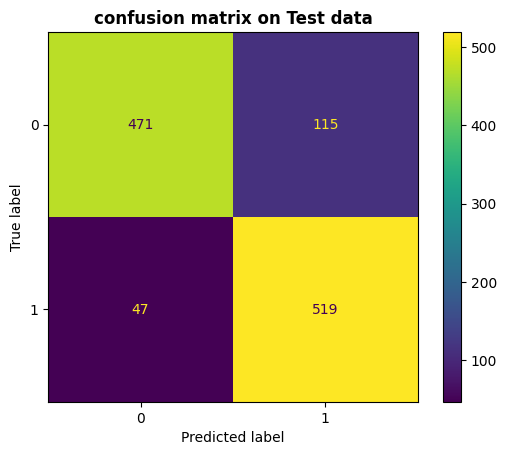

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


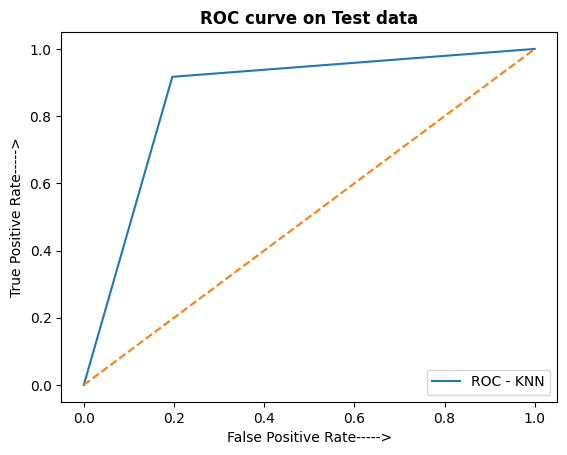

In [ ]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

###  Random Forest

 learning method that constructs a multitude of decision trees at training time and outputs the mode of the classes (for classification) or mean prediction (for regression) of the individual trees. It is known for its high accuracy, robustness, and ability to handle large datasets with numerous features.

In [ ]:
rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

train accuracy : 0.97
test accuracy : 0.883
train precision : 0.991
test precision : 0.907
train recall : 0.95
test recall : 0.848
train f1 : 0.97
test f1 : 0.877
train roc_auc : 0.998
test roc_auc : 0.951
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       586
           1       0.91      0.85      0.88       566

    accuracy                           0.88      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.88      0.88      0.88      1152

--------------------------------------------------------------------------------


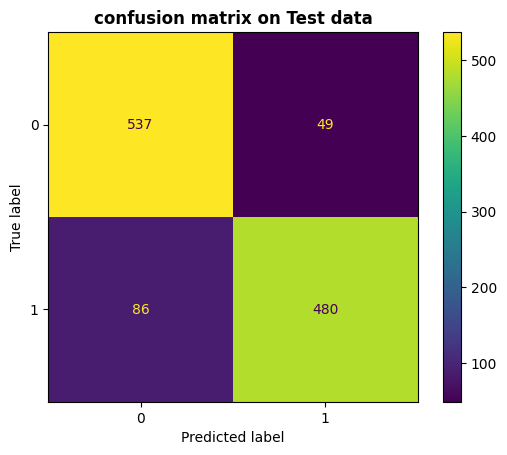

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


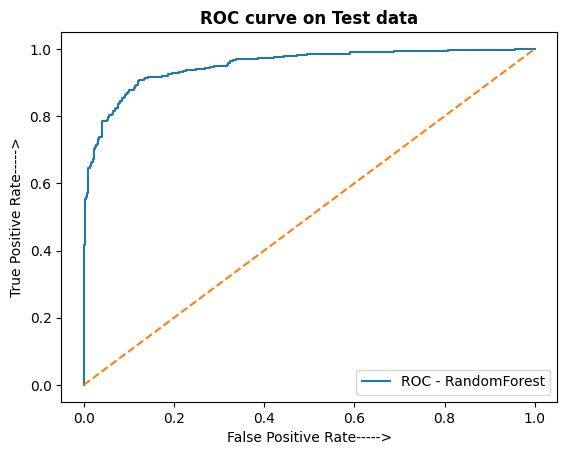

In [ ]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model
predict(optimal_model, 'RandomForest')

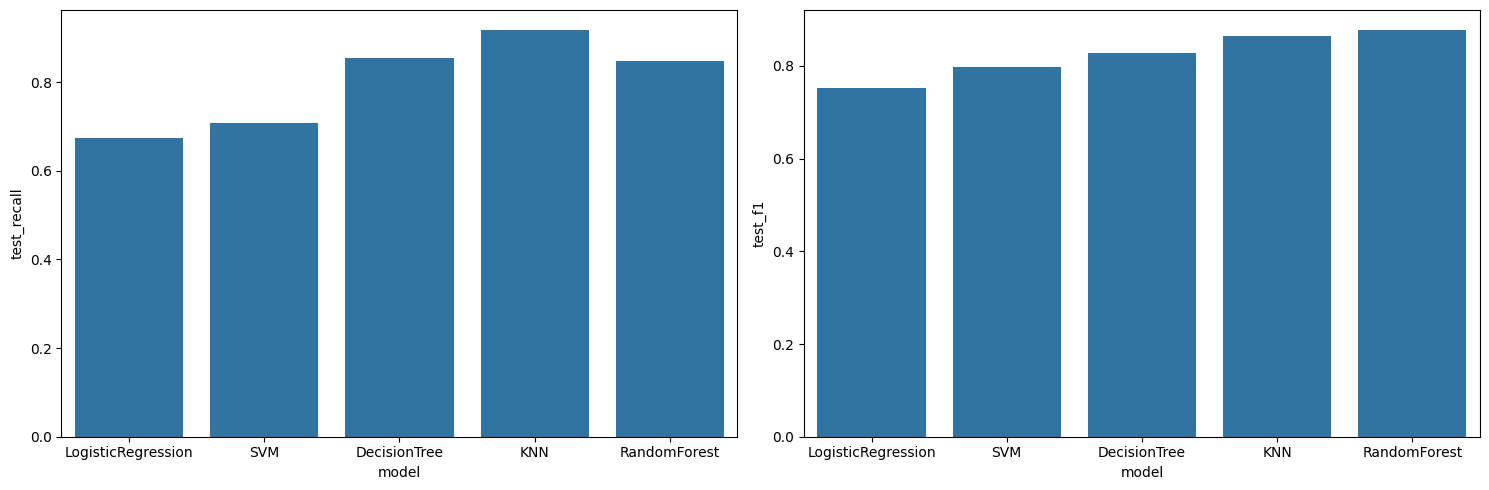

In [ ]:
model_result = pd.DataFrame(model_result)
round(model_result,3)


fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score 
plt.tight_layout()